# AIDI 2000 -  Applied Machine Learning
## Lab #1
### Submitted By: Batool Talha
### Submission Date: July 08, 2024

### Prepare Problem

In [4]:
# Load Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf


In [5]:
# Load the Titanic dataset
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Summarize Data/ Exploratory Data Analysis

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


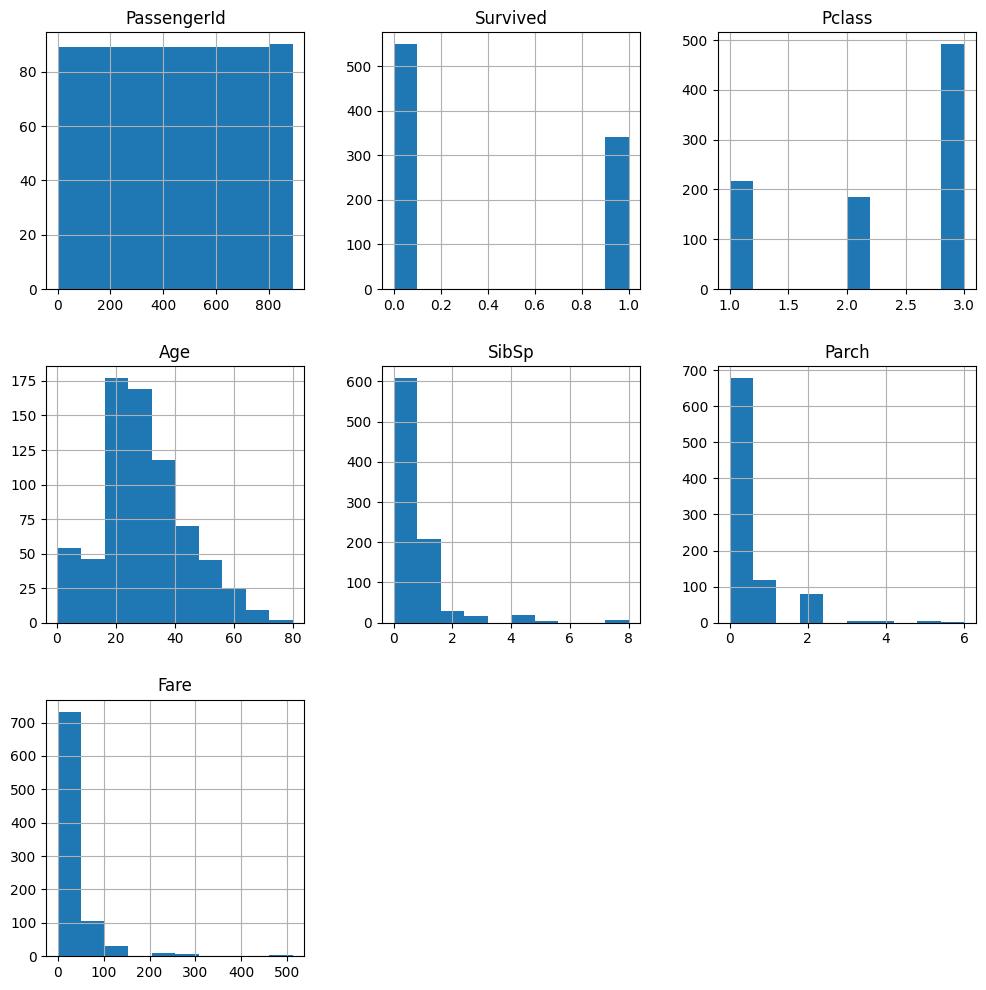

In [12]:
df.hist(figsize=(12, 12))
plt.show()

In [13]:
# Feature <Cabin> has missing data. Furthermore, it has categorial data.
# This feature does not look relevant also in predicting the survival of 
# passengers. For this reason, instead of filling out the missing data,
# removing this data from the dataset
df= df.drop(labels='Cabin', axis='columns')

In [14]:
# Feature <Name> is categorial data.
# This feature does not look relevant in predicting the survival of 
# passengers. Therefore, removing this data from the dataset
df= df.drop(labels='Name', axis='columns')

In [15]:
# Feature <Age> has missing data. Filling out the missing data for <Age>
df['Age']= df['Age'].fillna(df['Age'].mean())

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [18]:
# Encoding features <Sex> & <Embarked> to convert them from categorical data to numerical data

# Instantiating the label encoder
label_encoder = LabelEncoder()

# Encoding features <Sex> & <Embarked>
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2


In [19]:
# Feature <Ticket> is categorial data.
# This feature does not look relevant in predicting the survival of 
# passengers. Therefore, removing this data from the dataset
df= df.drop(labels='Ticket', axis='columns')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [20]:
columns_titles = ["Survived", "PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df=df.reindex(columns=columns_titles)
df.head()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,1,22.0,1,0,7.2500,2
1,1,2,1,0,38.0,1,0,71.2833,0
2,1,3,3,0,26.0,0,0,7.9250,2
3,1,4,1,0,35.0,1,0,53.1000,2
4,0,5,3,1,35.0,0,0,8.0500,2


In [21]:
# Calculate the correlation matrix for the dataset
df.corr()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.005007,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
PassengerId,-0.005007,1.000000,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013083
Pclass,-0.338481,-0.035144,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.042939,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.069809,0.033207,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.035322,-0.057527,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,-0.001652,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,0.012658,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.013083,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


<Axes: >

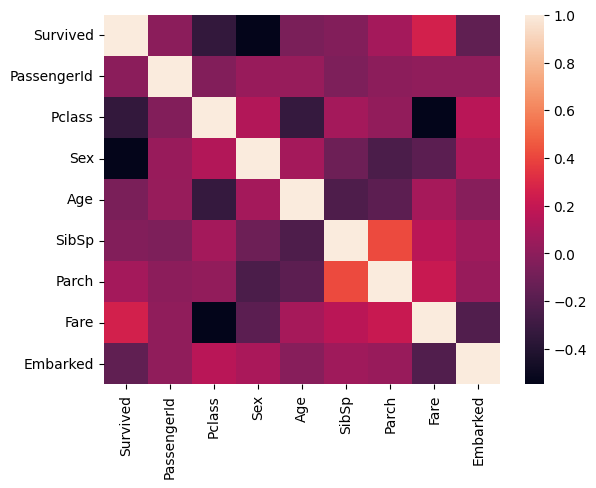

In [22]:
#Visualization of Correlations
# fig = plt.figure(figsize=(10,5))
# sns.heatmap(df.corr(),annot=True,cmap="Blues")
sns.heatmap(df.corr())

### Prepare Data

<Axes: >

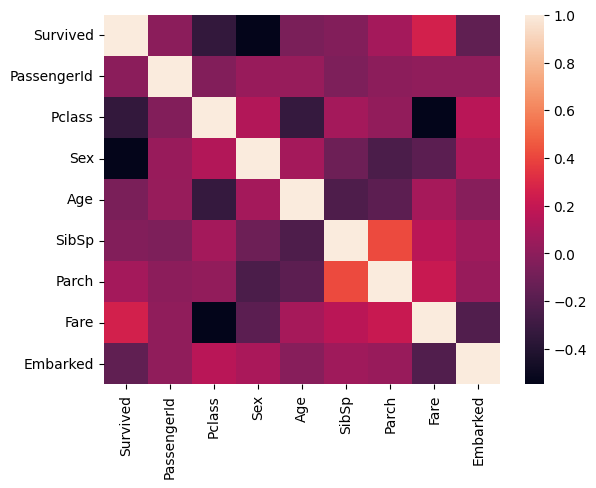

In [23]:
# Calculate the correlation matrix for the dataset
data_corr = df.corr()
#Visualization of Correlations
sns.heatmap(data_corr)

In [24]:
# Split the dataset into input (X) and output (y) attributed
X = df.drop(columns = ['Survived'])
y = df['Survived']

### Supporting Functions

In [41]:
def calculate_print_performace_metrics(y_train_test, y_pred_train_test):
    # Calculate & print performace metrics
    print('Accuracy: {}'.format(accuracy_score(y_train_test, y_pred_train_test)))
    print('Precision: {}'.format(precision_score(y_train_test, y_pred_train_test)))
    print('Recall: {}'.format(recall_score(y_train_test, y_pred_train_test)))
    print('confusion_matrix: ', confusion_matrix(y_train_test, y_pred_train_test))
    displ = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train_test, y_pred_train_test))
    displ.plot()
    print(classification_report(y_train_test, y_pred_train_test))

In [26]:
def calculate_plot_roc(y_train_test, y_pred_train_test_probs):
    '''
    
    Parameters:
        y_train_test: true values (first argument), 
        y_pred_train_test_probs: predicted probabilities(second argument)

    Returns:
        roc_curve returns 3 objects fpr, tpr, thresholds
        fpr: false positive rate
        tpr: true positive rate
        thresholds:
    '''
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_train_test, y_pred_train_test_probs)
    # print(fpr)
    # print(tpr)
    # print(thresholds)

    # Calculate the AUC score
    auc_score = roc_auc_score(y_train_test, y_pred_train_test_probs)
    print(f"AUC Score: {auc_score}")
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.legend()
    plt.show()

### Common Steps for All Models

In [27]:
# Split the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Determine the number of input features
n_features = X_train.shape[1]
print(n_features)

(623, 8) (268, 8) (623,) (268,)
8


### Model Building and Evaluate Algorithm 
#### ML Model #1 - Gradient Boost Classifier

In [28]:
# Initialize the instance of Gradient Boost Classifier
gb_clf = GradientBoostingClassifier()
# Use all the defaults of the model as set in sci-kit learn
# GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, 
#                            n_estimators=100, subsample=1.0, 
#                            criterion='friedman_mse', min_samples_split=2, 
#                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                            max_depth=3, min_impurity_decrease=0.0, init=None, 
#                            random_state=None, max_features=None, verbose=0, 
#                            max_leaf_nodes=None, warm_start=False, 
#                            validation_fraction=0.1, n_iter_no_change=None, 
#                            tol=0.0001, ccp_alpha=0.0)
# Fit the training data to the gradient boost model
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [29]:
gb_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Accuracy: 0.9213483146067416
Precision: 0.9330143540669856
Recall: 0.8478260869565217
confusion_matrix:  [[379  14]
 [ 35 195]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       393
           1       0.93      0.85      0.89       230

    accuracy                           0.92       623
   macro avg       0.92      0.91      0.91       623
weighted avg       0.92      0.92      0.92       623

AUC Score: 0.9727403473835601


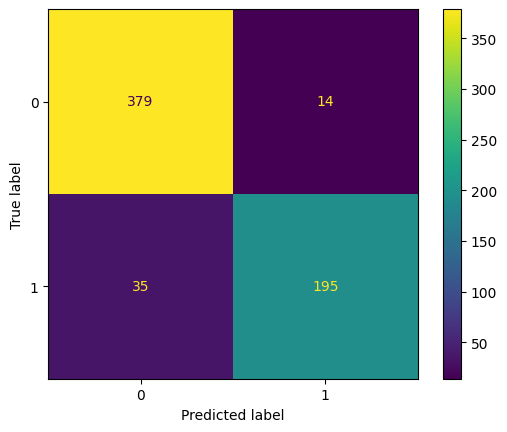

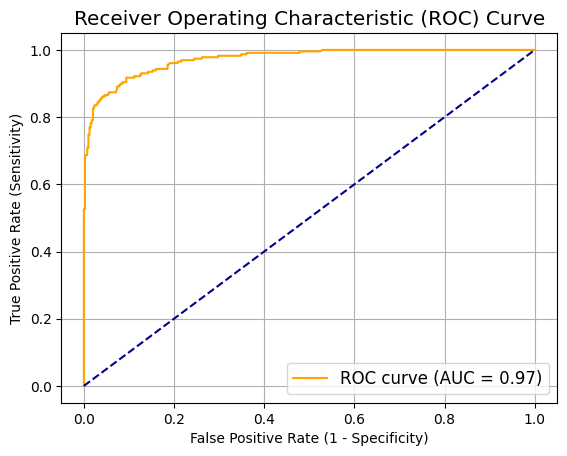

In [42]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = gb_clf.predict(X_train)
y_pred_train_probs_temp = gb_clf.predict_proba(X_train)
y_pred_train_probs = y_pred_train_probs_temp[:, 1]
# print(y_pred_train)
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train)
calculate_plot_roc(y_train, y_pred_train_probs)


Accuracy: 0.7947761194029851
Precision: 0.8275862068965517
Recall: 0.6428571428571429
confusion_matrix:  [[141  15]
 [ 40  72]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       156
           1       0.83      0.64      0.72       112

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268

AUC Score: 0.8234317765567766


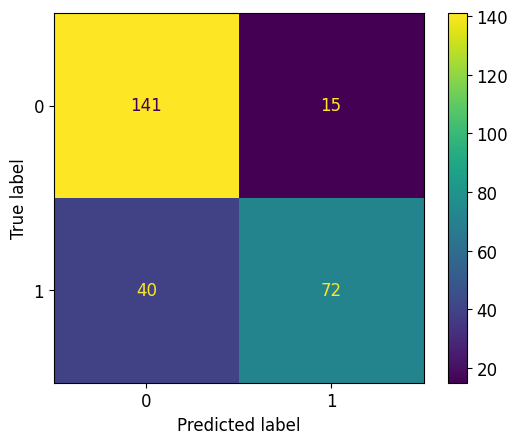

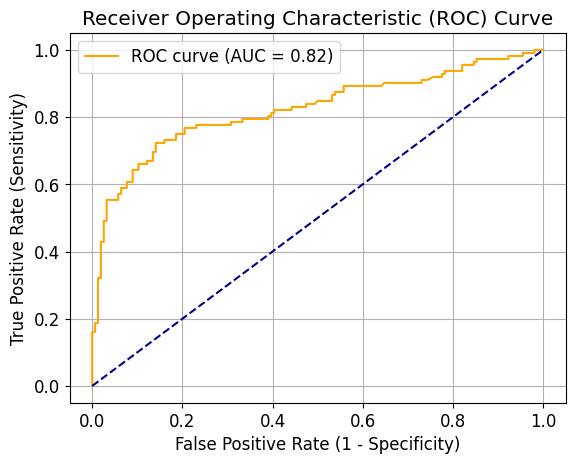

In [43]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = gb_clf.predict(X_test)
y_pred_test_probs_temp = gb_clf.predict_proba(X_test)
y_pred_test_probs = y_pred_test_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test)
calculate_plot_roc(y_test, y_pred_test_probs)


The model performance for training & test datasets is not drastically different. However, the model needs optimization.

### Model Building and Evaluate Algorithm 
#### ML Model #2 - Hist Gradient Boost Classifier

In [44]:
# Initialize the instance of Gradient Boost Classifier
hgb_clf = HistGradientBoostingClassifier()
# Use all the defaults of the model as set in sci-kit learn
# HistGradientBoostingClassifier(loss='log_loss', 
#                                *, learning_rate=0.1, max_iter=100, 
#                                max_leaf_nodes=31, max_depth=None, 
#                                min_samples_leaf=20, l2_regularization=0.0, 
#                                max_features=1.0, max_bins=255, 
#                                categorical_features='warn', monotonic_cst=None, 
#                                interaction_cst=None, warm_start=False, 
#                                early_stopping='auto', scoring='loss', 
#                                validation_fraction=0.1, n_iter_no_change=10, 
#                                tol=1e-07, verbose=0, random_state=None, 
#                                class_weight=None)
# Fit the training data to the gradient boost model
hgb_clf.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [45]:
hgb_clf.get_params()

{'categorical_features': 'warn',
 'class_weight': None,
 'early_stopping': 'auto',
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_bins': 255,
 'max_depth': None,
 'max_features': 1.0,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [46]:
hgb_clf.score(X_train, y_train)

0.9967897271268058

Accuracy: 0.9967897271268058
Precision: 0.9956521739130435
Recall: 0.9956521739130435
confusion_matrix:  [[392   1]
 [  1 229]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       230

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623

AUC Score: 0.9999778736585906


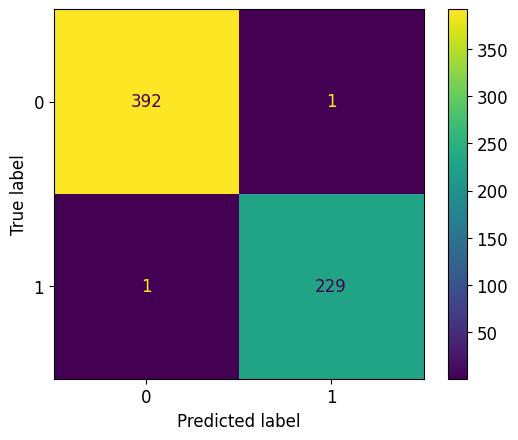

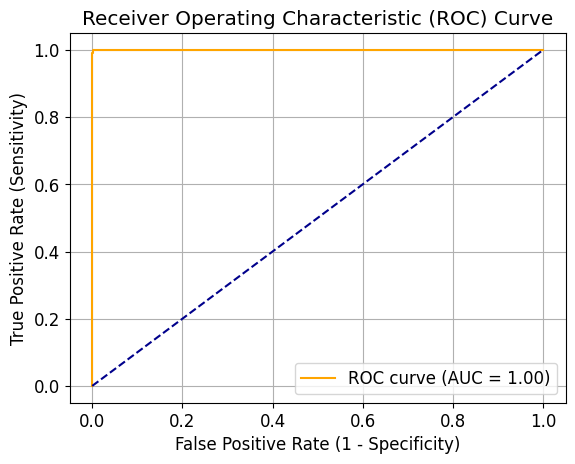

In [47]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = hgb_clf.predict(X_train)
y_pred_train_probs_temp = hgb_clf.predict_proba(X_train)
y_pred_train_probs = y_pred_train_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train)
calculate_plot_roc(y_train, y_pred_train_probs)


Accuracy: 0.7947761194029851
Precision: 0.8064516129032258
Recall: 0.6696428571428571
confusion_matrix:  [[138  18]
 [ 37  75]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       156
           1       0.81      0.67      0.73       112

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268

AUC Score: 0.7987065018315017


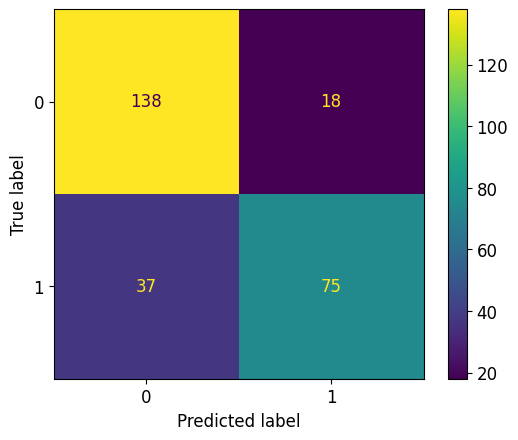

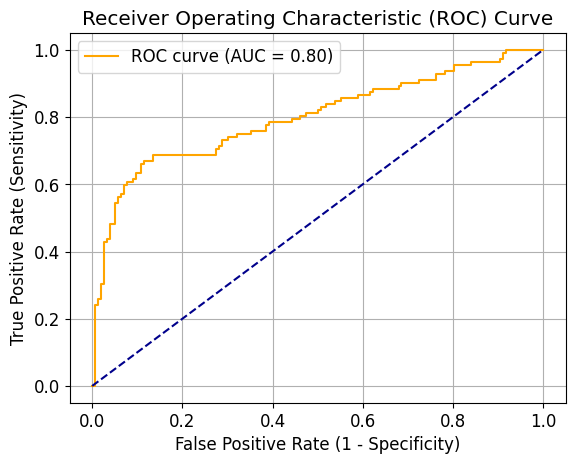

In [48]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = hgb_clf.predict(X_test)
y_pred_test_probs_temp = hgb_clf.predict_proba(X_test)
y_pred_test_probs = y_pred_test_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test)
calculate_plot_roc(y_test, y_pred_test_probs)


In [52]:
# Optimize the hyperparameters of the model to improve accurary
parameters = {'learning_rate': [0.005, 0.001, 0.01], 
             'max_iter': [500, 1000, 5000, 10000, 15000],
              'max_depth': [5, 7, 9, 10, 11],
              'max_leaf_nodes': [31, 50, 60, 100, 500, 1000]
             }
hgb_reg_opt_lr_0pt001_0pt005_0pt01 = HistGradientBoostingClassifier()
hgb_reg_opt_lr_0pt001_0pt005_0pt01 = GridSearchCV(hgb_reg_opt_lr_0pt001_0pt005_0pt01, 
                                                 parameters,
                                                 scoring=['accuracy', 'roc_auc'],
                                                 refit='roc_auc',
                                                 cv=8,
                                                 verbose=3,
                                                 n_jobs=-1,
                                                 return_train_score=True)
# Fit the training data to the random foreat model
hgb_reg_opt_lr_0pt001_0pt005_0pt01.fit(X_train, y_train)

Fitting 8 folds for each of 450 candidates, totalling 3600 fits


GridSearchCV(cv=8, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.001, 0.01],
                         'max_depth': [5, 7, 9, 10, 11],
                         'max_iter': [500, 1000, 5000, 10000, 15000],
                         'max_leaf_nodes': [31, 50, 60, 100, 500, 1000]},
             refit='roc_auc', return_train_score=True,
             scoring=['accuracy', 'roc_auc'], verbose=3)

In [53]:
hgb_reg_opt_lr_0pt001_0pt005_0pt01.score(X_train, y_train)

0.9425047018475496

In [54]:
hgb_reg_opt_lr_0pt001_0pt005_0pt01.best_params_

{'learning_rate': 0.005, 'max_depth': 5, 'max_iter': 500, 'max_leaf_nodes': 31}

Accuracy: 0.869983948635634
Precision: 0.8860103626943006
Recall: 0.7434782608695653
confusion_matrix:  [[371  22]
 [ 59 171]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       393
           1       0.89      0.74      0.81       230

    accuracy                           0.87       623
   macro avg       0.87      0.84      0.86       623
weighted avg       0.87      0.87      0.87       623

AUC Score: 0.9425047018475496


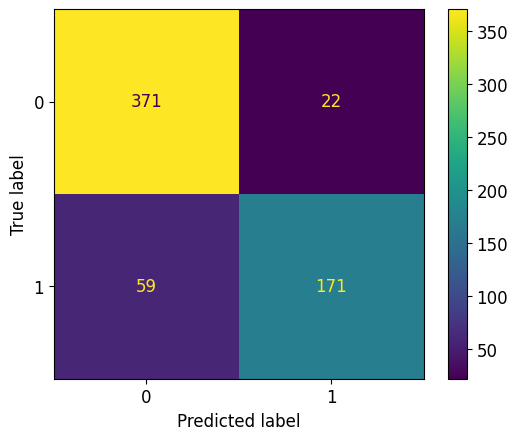

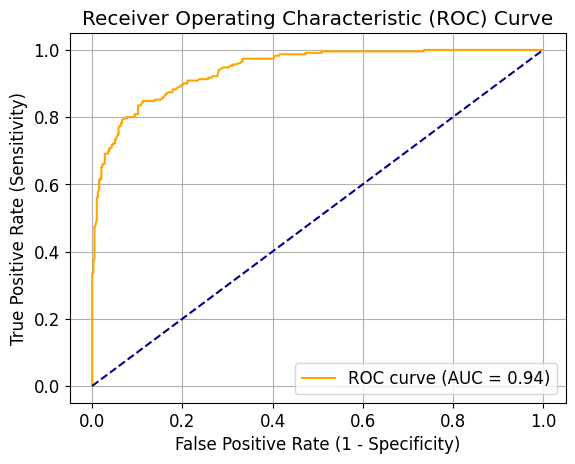

In [57]:
# Predict the output using the training data using the created/ fitted model
y_pred_train_hgb_lr_0pt001_0pt005_0pt01 = hgb_reg_opt_lr_0pt001_0pt005_0pt01.predict(X_train)
y_pred_train_hgb_lr_0pt001_0pt005_0pt01_probs_temp = hgb_reg_opt_lr_0pt001_0pt005_0pt01.predict_proba(X_train)
y_pred_train_hgb_lr_0pt001_0pt005_0pt01_probs = y_pred_train_hgb_lr_0pt001_0pt005_0pt01_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_train, y_pred_train_hgb_lr_0pt001_0pt005_0pt01)
calculate_plot_roc(y_train, y_pred_train_hgb_lr_0pt001_0pt005_0pt01_probs)


# # Predict the output using the test data using the created/ fitted model
# y_pred_test_hgb_lr_0pt001_0pt005_0pt01 = hgb_reg_opt_lr_0pt001_0pt005_0pt01.predict(X_test)
# y_pred_test_hgb_lr_0pt001_0pt005_0pt01_probs_temp = hgb_reg_opt_lr_0pt001_0pt005_0pt01.predict_proba(X_test)
# y_pred_test_hgb_lr_0pt001_0pt005_0pt01_probs = y_pred_test_hgb_lr_0pt001_0pt005_0pt01_probs_temp[:, 1]
# # Calculate the performance metrics like accuracy, precision, recall, ROC curve
# # Print performace metrics
# calculate_print_performace_metrics(y_test, y_pred_test_hgb_lr_0pt001_0pt005_0pt01)
# calculate_plot_roc(y_test, y_pred_test_hgb_lr_0pt001_0pt005_0pt01_probs)

Accuracy: 0.7761194029850746
Precision: 0.8421052631578947
Recall: 0.5714285714285714
confusion_matrix:  [[144  12]
 [ 48  64]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       156
           1       0.84      0.57      0.68       112

    accuracy                           0.78       268
   macro avg       0.80      0.75      0.75       268
weighted avg       0.79      0.78      0.77       268

AUC Score: 0.8197401556776558


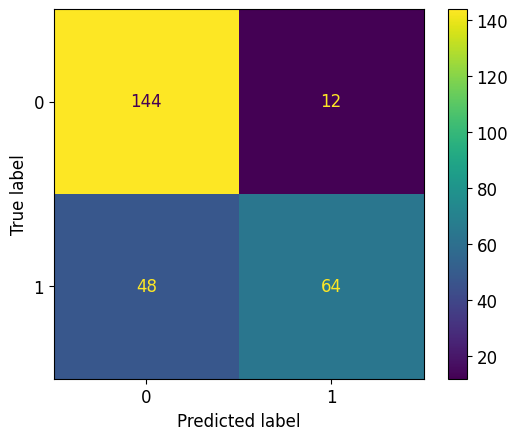

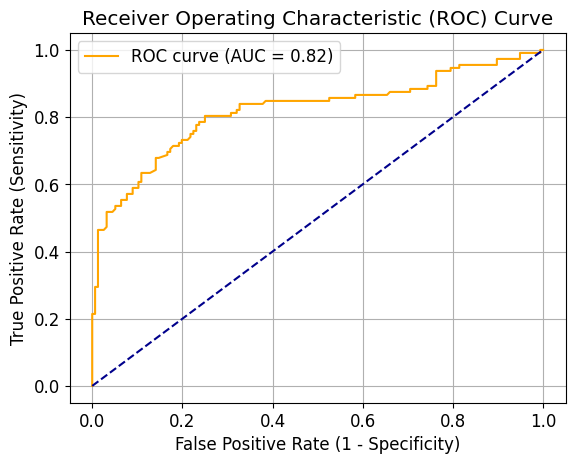

In [58]:
# Predict the output using the test data using the created/ fitted model
y_pred_test_hgb_lr_0pt001_0pt005_0pt01 = hgb_reg_opt_lr_0pt001_0pt005_0pt01.predict(X_test)
y_pred_test_hgb_lr_0pt001_0pt005_0pt01_probs_temp = hgb_reg_opt_lr_0pt001_0pt005_0pt01.predict_proba(X_test)
y_pred_test_hgb_lr_0pt001_0pt005_0pt01_probs = y_pred_test_hgb_lr_0pt001_0pt005_0pt01_probs_temp[:, 1]
# Calculate the performance metrics like accuracy, precision, recall, ROC curve
# Print performace metrics
calculate_print_performace_metrics(y_test, y_pred_test_hgb_lr_0pt001_0pt005_0pt01)
calculate_plot_roc(y_test, y_pred_test_hgb_lr_0pt001_0pt005_0pt01_probs)

### Model Comparison

| Sr. # | Model                                                | Accuracy Score  | AUC Value|
| ----- | --------------------------------------------------   | --------------- |----------|
| 1     | Gradient Boost Classifier without optimization       | 79%             |          |
| 2     | Hist Gradient Boost Classifier without optimization  | 79%             |  0.80    |
| 3     | Hist Gradient Boost Classifier with optimization     | 77%             |  0.82    |